In [121]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [122]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 


#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 
print(Vax_Data.iloc[:,1].unique())


['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


In [123]:
#dd_drop = Vax_Data.groupby("disease").first()
#dd_drop.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])
dd_complete_15 = dd_complete_15.reset_index()

print(dd_complete_4.head())
dd_complete_15["county"].unique()
dd_complete_15["disease"].unique()


    county  disease  year  count
0  Alameda  Measles  2001      1
1  Alameda  Measles  2002      0
2  Alameda  Measles  2003      2
3  Alameda  Measles  2004      0
4  Alameda  Measles  2005      0


array(['Measles', 'Mumps', 'Pertussis', 'Tetanus'], dtype=object)

In [124]:
dd_complete_15.head()

,county,disease,year,count
0,Alameda,Measles,2001,1
1,Alameda,Measles,2002,0
2,Alameda,Measles,2003,2
3,Alameda,Measles,2004,0
4,Alameda,Measles,2005,0


In [125]:
#la_meas_ct = dd_complete_15.query('county == "Los Angeles" and disease == "Measles"')
#la_mump_ct = dd_complete_15.query('county == "Los Angeles" and disease == "Mumps"')
#la_pert_ct = dd_complete_15.query('county == "Los Angeles" and disease == "Pertussis"')
#la_teta_ct = dd_complete_15.query('county == "Los Angeles" and disease == "Tetanus"')
#la_disease = pd.concat([la_meas_ct, la_mump_ct, la_pert_ct, la_teta_ct])
#la_disease.head(20)

#la_disease.plot.bar(x="year", y="count")

# la_2_disease = pd.merge(la_meas_ct,la_mump_ct, on =["county","year"], how="left")
# la_2_disease = la_2_disease.rename(columns={"count_x":"Measles count","count_y":"Mumps count"})
# la_3_disease = pd.merge(la_2_disease,la_pert_ct, on =["county","year"], how="left")
# la_3_disease = la_3_disease.rename(columns={"count":"Pertussis count"})
# la_all_disease = pd.merge(la_3_disease,la_teta_ct, on =["county","year"], how="left")
# la_all_disease = la_all_disease.rename(columns={"count":"Tetanus count"})
# #la_all_disease.set_index("year")
# la_all_disease = la_all_disease[["county","year","Measles count","Mumps count","Pertussis count","Tetanus count"]]
# la_all_disease.head(20)
# years = ct_LA.columns
# measl_count = ct_LA.iloc[0,:]
# mumps_count = ct_LA.iloc[1,:]
# la_meas_years = plt.bar(years,measl_count)
# la_mump_years = plt.bar(years,mumps_count)
#plt.show()

In [126]:
#piv_counties = dd_complete_15.pivot_table("count",["county","disease"],"year")
#piv_counties.fillna(0, inplace=True)
#piv_counties = piv_counties[[2009,2010,2011,2012,2013,2014,2015,2016,2017]]
#piv_counties.head()

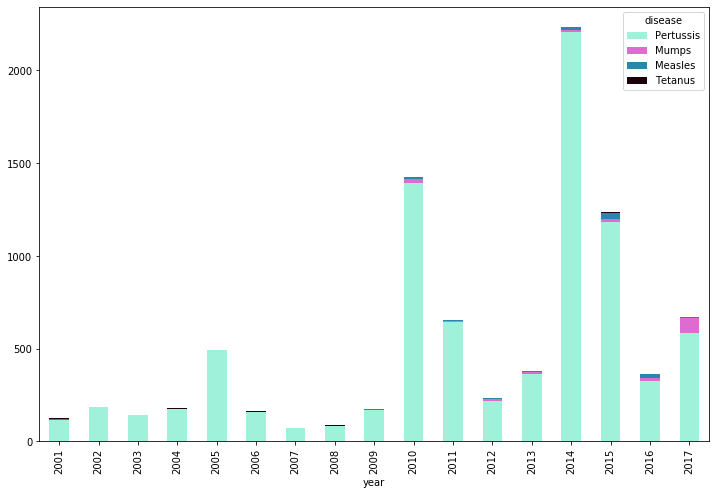

In [155]:
ct_LA = dd_complete_15.loc[dd_complete_15["county"]=="Los Angeles"]
pivLA_counties = ct_LA.pivot(index="year",columns="disease",values="count")
pivLA_counties.fillna(0, inplace=True)
pivLA_counties.head(20)
colors= ["#A0F1D9","#DE6BCF","#2B86AB","#1C010A"]
pivLA_counties.loc[:,["Pertussis","Mumps","Measles","Tetanus"]].plot.bar(stacked=True,color=colors,figsize=(12,8))
plt.show()


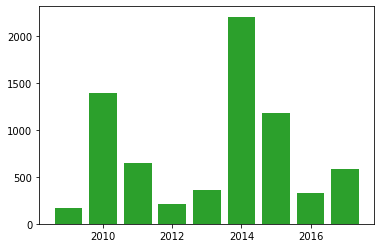

In [104]:
ct_LA = piv_counties.loc["Los Angeles"]
years = ct_LA.columns
#years = [2009,2010,2011,2012,2013,2014,2015,2016,2017]
#len_years = len(years)
measl_count = ct_LA.iloc[0,:]
mumps_count = ct_LA.iloc[1,:]
pertu_count = ct_LA.iloc[2,:]
tetan_count = ct_LA.iloc[3,:]
diseases = [measl_count, mumps_count, pertu_count, tetan_count]
la_meas_years = plt.bar(years,measl_count)
la_mump_years = plt.bar(years,mumps_count)
la_pert_years = plt.bar(years,pertu_count)
la_teta_years = plt.bar(years,tetan_count)
plt.show()
#la_4_dis = ct_LA.plot.bar(x=len_years, y=diseases, stacked=True)
